In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import randint
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [2]:
medical = pd.read_csv("medical_cost_insurance.csv")

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Checking Duplicate value
medical.duplicated().any()

True

In [8]:
medical.duplicated().sum()

1

In [10]:
medical[medical.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


### * In this data set there is 1 duplicate values we have to remove those value for data quality purpose.


In [14]:
# Drop Duplicate Values
medical.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
# Unique Counts for Quailty feature 

medical['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
# Unique Counts for Quailty feature 

medical['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
change_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
medical_cost = medical.copy()
medical_cost.replace(change_data, inplace=True)

In [22]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [24]:
medical_cost.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.514948,1.105572,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### ~ Conculsion
1. BMI has a significant difference between the 75th percentile (34.6) and the maximum value (53.3), 
indicating the presence of outliers in the dataset.

2. Charges show notable discrepancies between their 75th percentile and maximum values,"Charges" the 75th percentile is 16639.9, 
whereas the maximum value is much higher at 63770.42.

In [25]:
### 📊 Exploratory Data Analysis.📊 ###

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

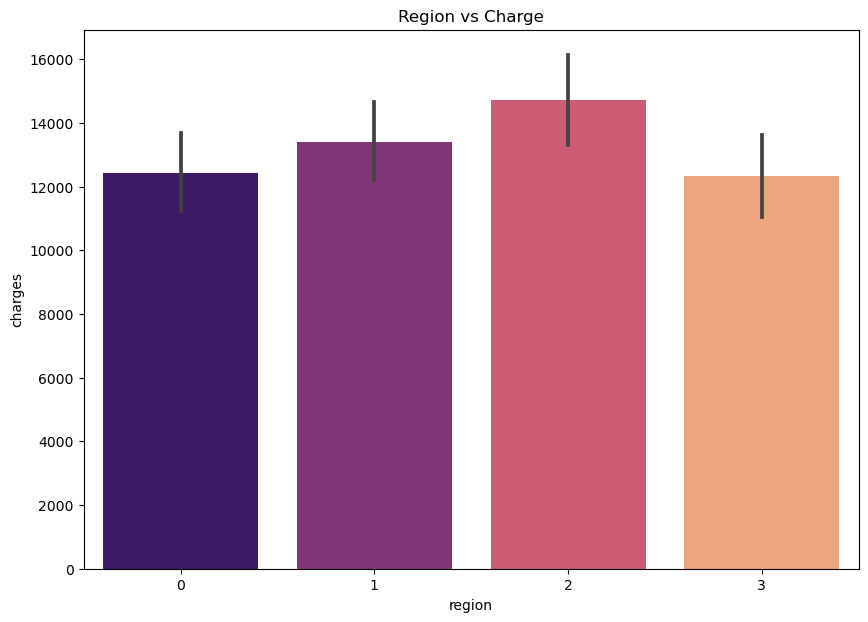

In [32]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=medical_cost,palette='magma')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

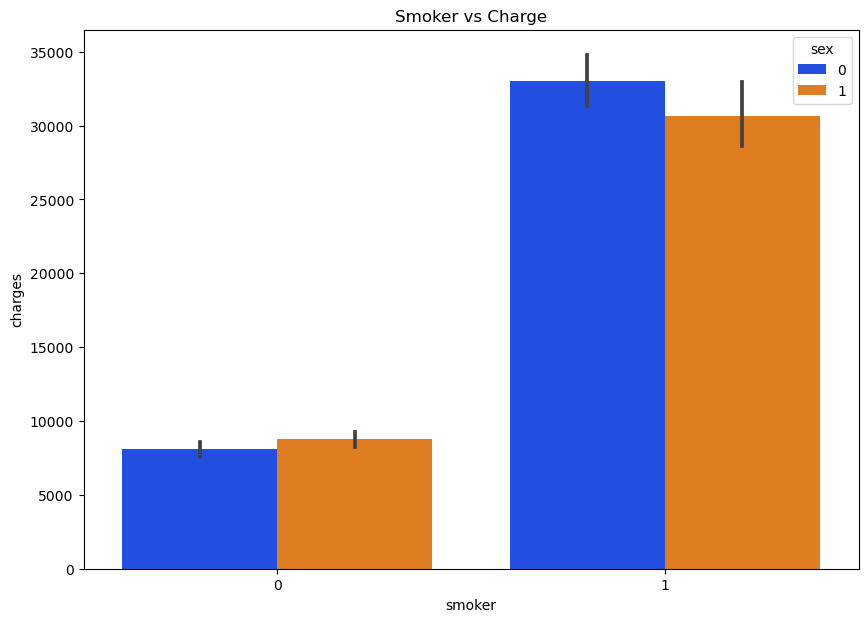

In [39]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=medical_cost,palette='bright',hue='sex')

Text(0.5, 1.0, 'BMI VS Charge')

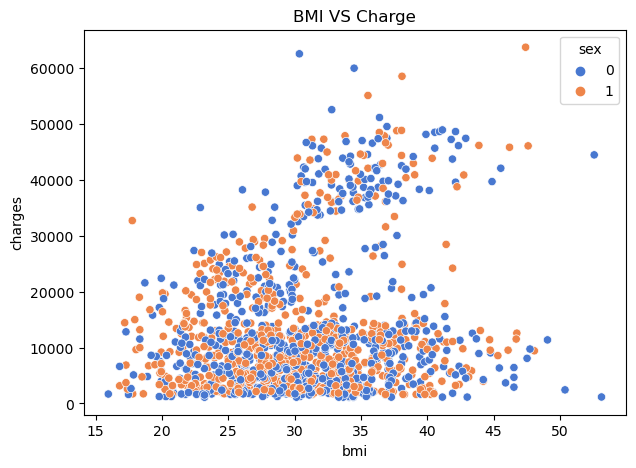

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=medical_cost,palette='muted')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

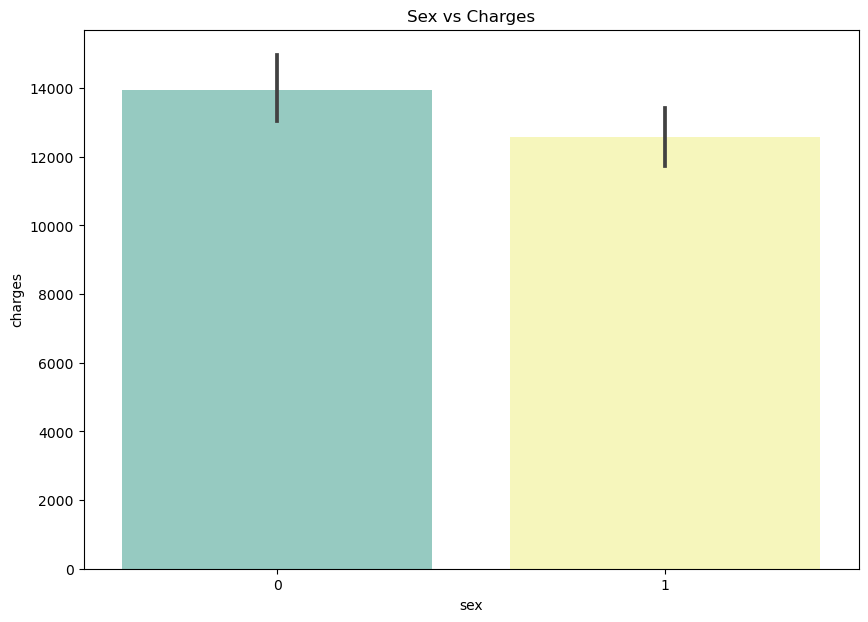

In [42]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=medical_cost,palette='Set3')


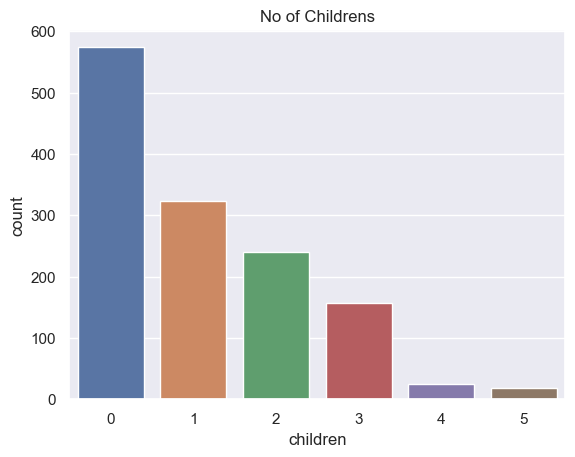

In [57]:
sns.set()
sns.countplot(x='children',data=medical_cost)
plt.title('No of Childrens')
plt.show()

In [60]:
medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [61]:
# Calculate and print skewness and kurtosis for all columns
print("Printing Skewness and Kurtosis for all columns")
print()

for col in medical_cost.columns:
    skewness = medical_cost[col].skew()
    kurtosis = medical_cost[col].kurt()
    
    print(f"- {col}: Skewness {skewness:.3f} and Kurtosis {kurtosis:.3f}")

Printing Skewness and Kurtosis for all columns

- age: Skewness 0.056 and Kurtosis -1.245
- sex: Skewness 0.021 and Kurtosis -2.003
- bmi: Skewness 0.284 and Kurtosis -0.051
- children: Skewness 0.938 and Kurtosis 0.202
- smoker: Skewness 1.465 and Kurtosis 0.146
- region: Skewness -0.038 and Kurtosis -1.329
- charges: Skewness 1.516 and Kurtosis 1.606


<Figure size 1000x700 with 0 Axes>

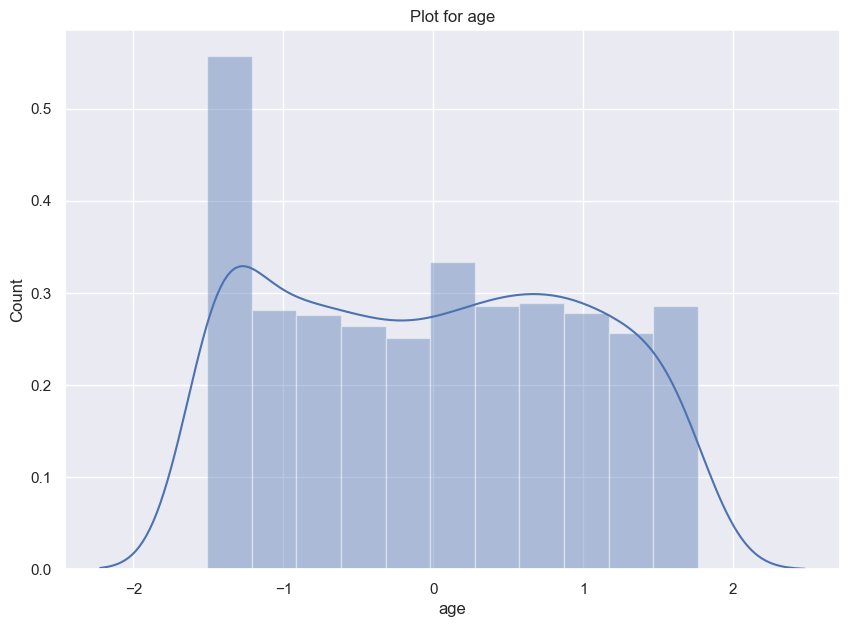

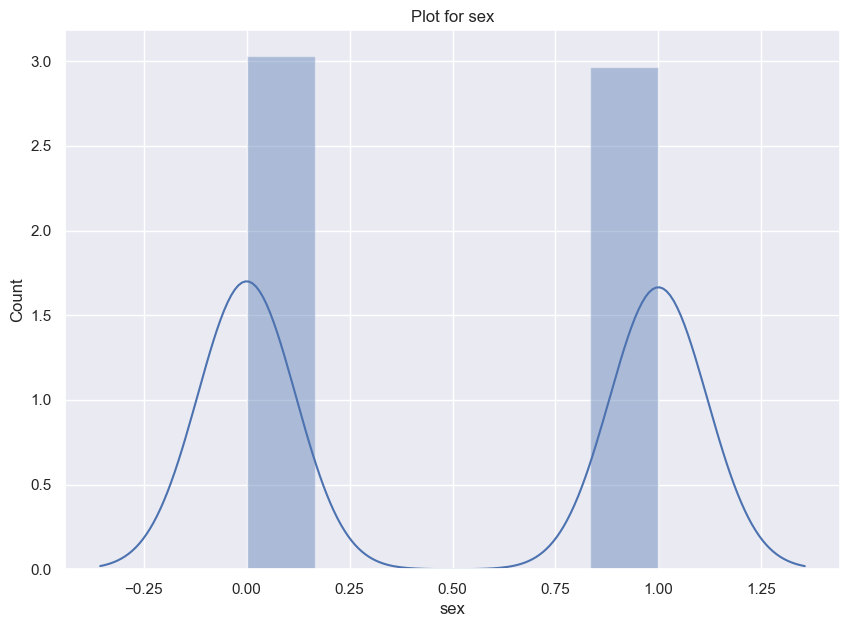

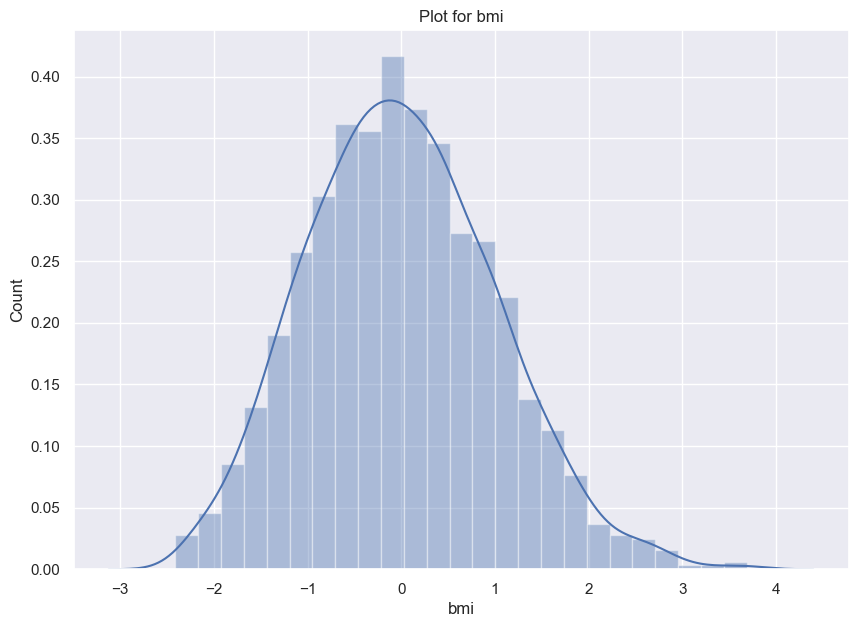

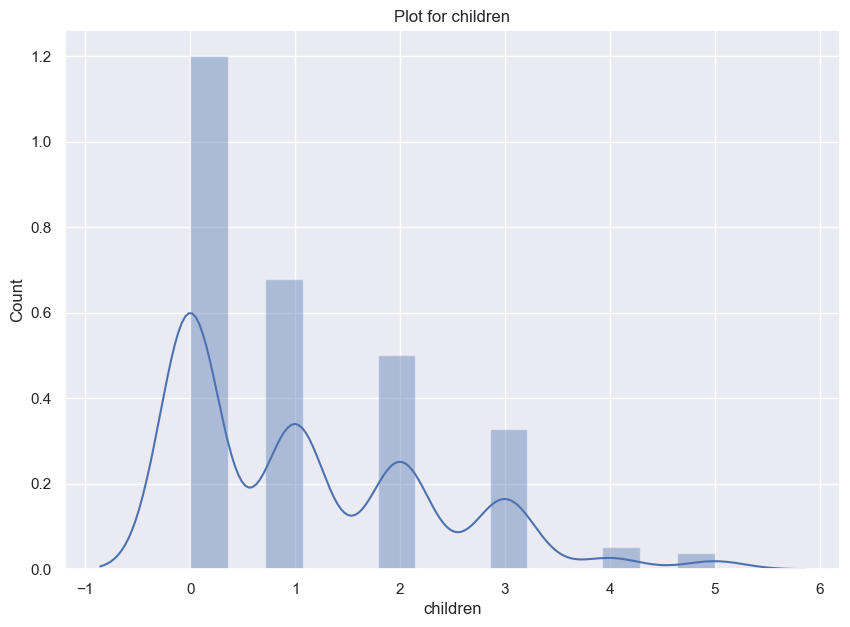

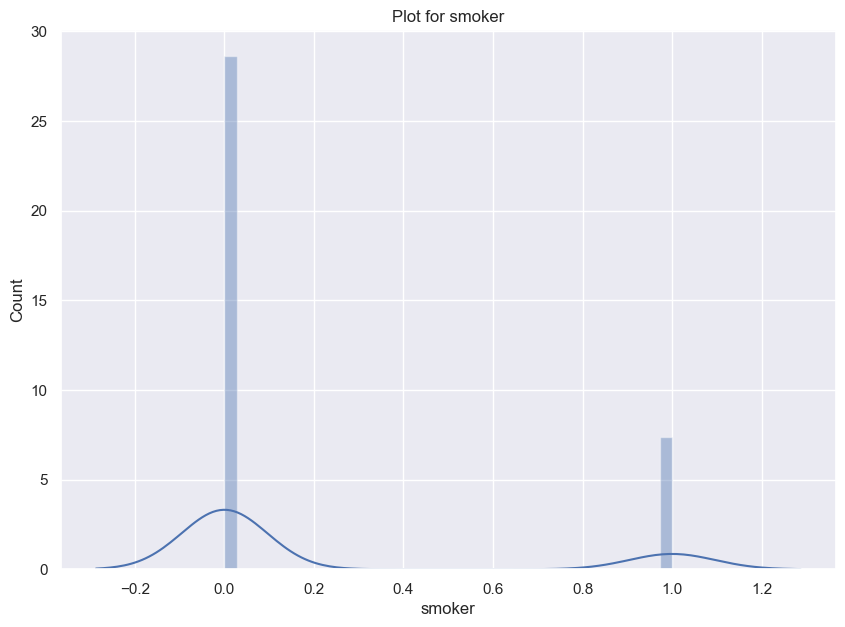

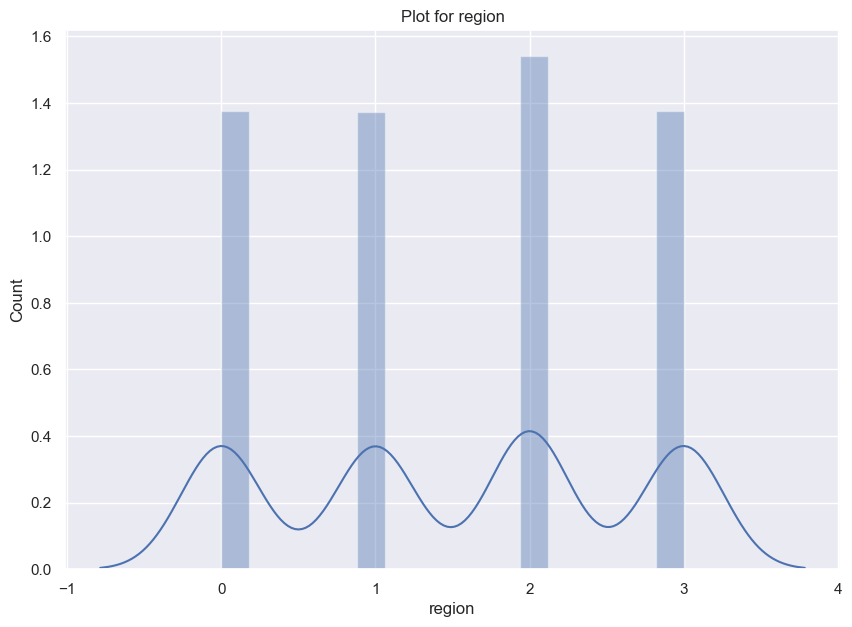

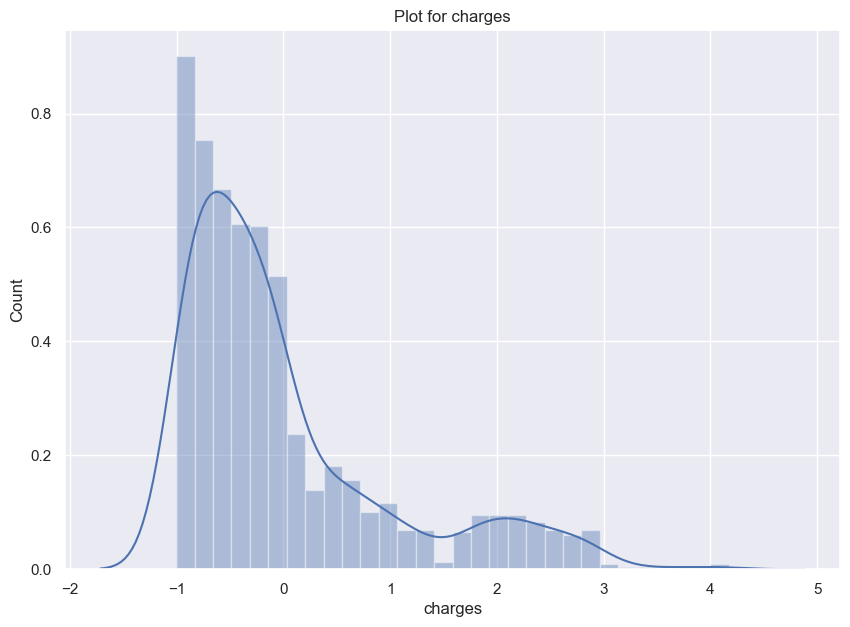

In [62]:
# List of features in the dataset
features = medical_cost.columns

# Set the size of the figure for all plots
plt.figure(figsize=(10, 7))

# Loop through each feature and create a distribution plot
for feature in features:
    plt.figure(figsize=(10, 7))  # Set the size of each plot
    sns.distplot(medical_cost[feature])
    plt.title(f"Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

### * There might be few outliers in Charges feature because it is right shift skewed 

## Standardization of Features

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# List of columns to standardize
columns_to_standardize = ['bmi', 'age', 'charges']

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize each column in the DataFrame
medical_cost[columns_to_standardize] = scaler.fit_transform(medical_cost[columns_to_standardize])

In [65]:
X = medical_cost.drop('charges',axis=1).values
y = medical_cost['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


####  Important Libraries 

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [66]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    plt.figure(figsize=(15, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted values using Linear Regression", fontsize=16)
    plt.show()

    print("Best Parameters for Linear Regression Model:")
    print("-------------------------------------------")
    print(model.get_params())
    print("-------------------------------------------")
    print("\nMean Squared Error on Training Data:", train_mse)
    print("-------------------------------------------")
    print("Mean Squared Error on Testing Data:", test_mse)
    print("-------------------------------------------")
    print("R-squared of the Model:", r2)
    print("-------------------------------------------")

In [68]:
# Create a Linear Regression instance
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

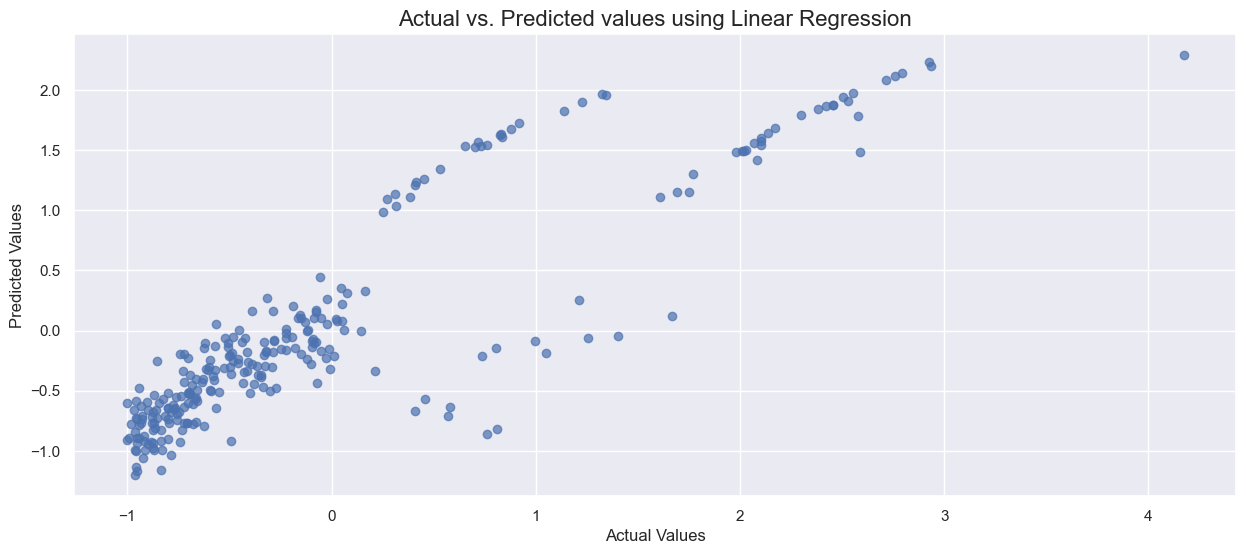

Best Parameters for Linear Regression Model:
-------------------------------------------
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
-------------------------------------------

Mean Squared Error on Training Data: 0.2546912906251974
-------------------------------------------
Mean Squared Error on Testing Data: 0.2302160746302599
-------------------------------------------
R-squared of the Model: 0.782693873608938
-------------------------------------------


In [69]:
# Evaluate the model
evaluate_model(linear_reg, X_train, y_train, X_test, y_test)

In [86]:
svr = SVR()

In [87]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, y_train.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [89]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, y_train.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=100, gamma=0.01, tol=0.0001)
0.8280130542348964


In [90]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.828
R2_score (train) : 0.853
R2 score (test) : 0.867
RMSE : 0.375
